In [1]:
using Revise
includet("../../scripts/single_influx.jl")

┌ Warning: Circular dependency detected.
│ Precompilation will be skipped for dependencies in this cycle:
│  ┌ Symbolics → SymbolicsForwardDiffExt
│  └─ Symbolics → SymbolicsPreallocationToolsExt
│ Precompilation will also be skipped for the following, which depend on the above cycle:
│   SSMC
│   MLSolver
└ @ Pkg.API.Precompilation ~/.julia/juliaup/julia-1.10.10+0.x64.linux.gnu/share/julia/stdlib/v1.10/Pkg/src/precompilation.jl:583
Precompiling packages...
  12324.1 ms  ✓ SSMCMain
  1 dependency successfully precompiled in 18 seconds. 539 already precompiled. 4 skipped due to circular dependency.


In [2]:
using ProgressMeter
using ColorSchemes

In [3]:
using GLMakie
using CairoMakie
CairoMakie.activate!()

# Kaka

In [4]:
f = jldopen("../../cluster_env/runs/single_influx/gd2_251103_153025.jld2");
Ks, lis, rslts = make_Kli_matrix(f);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


In [5]:
argmax([1, 4, 5, 3])

3

In [6]:
ext1 = ColorSchemes.Blues[5]
stable1 = ColorSchemes.Oranges[4]
unstable1 = ColorSchemes.Greens[4]

dominant = map(rslts) do x
    am = argmax([x.extinct, x.nonext_unstable, x.nonext_stable])
    if am == 1
        ext1
    elseif am == 2
        unstable1
    else
        stable1
    end
end;

In [7]:
LeakageScale.ltox

ltox (generic function with 1 method)

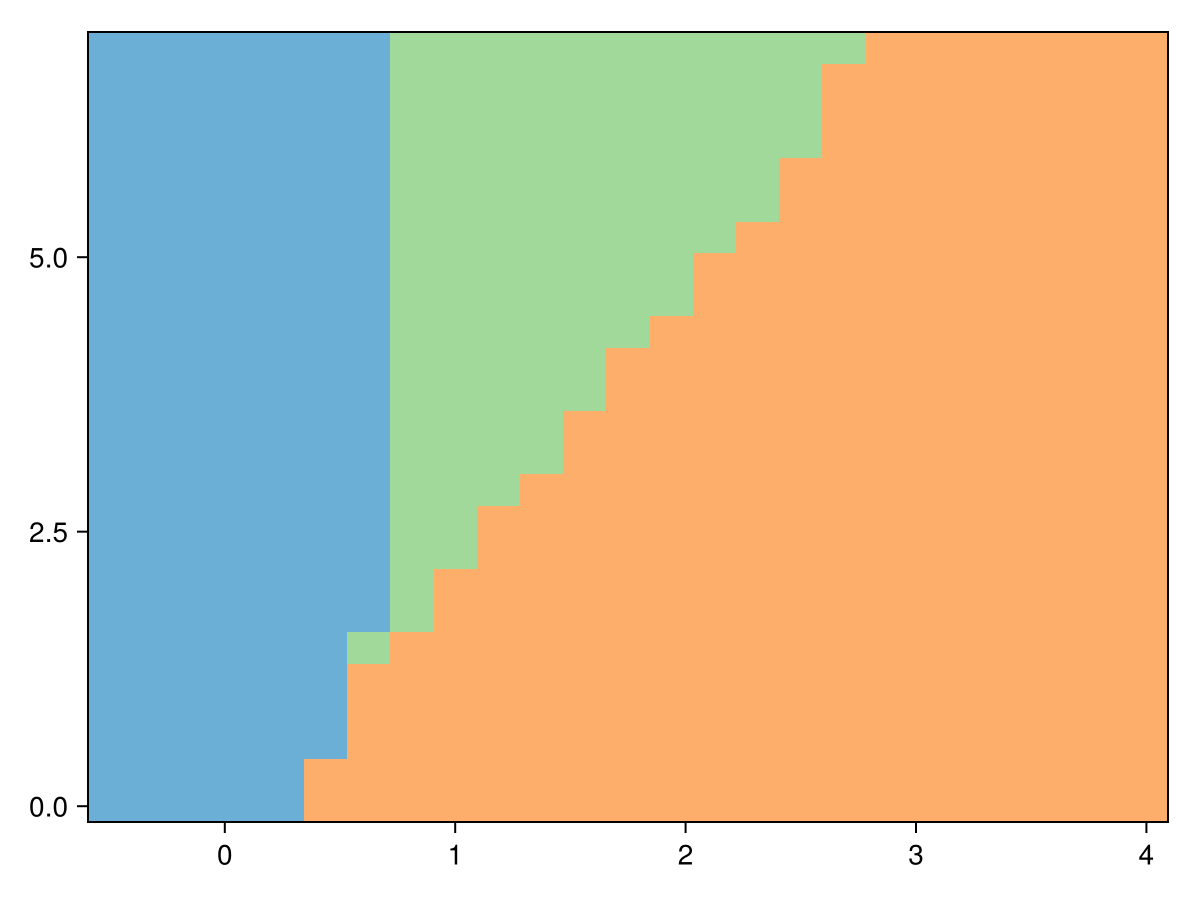

In [10]:
heatmap(log10.(Ks), LeakageScale.ltox.(lis), dominant)
# heatmap(log10.(Ks), lis, dominant)